# DSCI 614 Text Mining
# Visualize Text Data


 **Objectives**


After you complete this module, students will be able to:

+ Clean and preprocess the texts.
+ Plot the distribution of the texts using boxplot, histogram, and density plot.
+ Visualize the distribution of the word count using boxplot, histogram, and density plot.
+ Plot the distribution of the unigrams using scatter plot.
+ Visualize the tokens using scattertext.
+ Plot the sentence vectors using PCA and t-SNE.



It is well known that a graph is worth a thousand words. Visualization can help us find the patterns and trends using several charts instead of reading a thousand sentences. It is also a powerful tool to present your finds. We will cover it this week. First, we will load and clean the texts. Secondly,  I will show you how to plot the distribution of the texts, word count and unigrams. Second, we will use scattertexth to visualize tokens. Finally, we will learn how to plot the sentence vectors using dimensiona reduction techinques such as PCA and t-SNE.



**Readings**

+ A Complete Exploratory Data Analysis and Visualization for Text Data (https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html)
+ Scattertext (https://github.com/JasonKessler/scattertext)
+ TSNE & PCA Quick and Dirty Visuals (https://www.kaggle.com/arthurtok/tsne-pca-quick-and-dirty-visuals)





# The Twitter US Airline 

You have given a Twitter US Airline sentiment dataset containing in Tweets.csv (https://www.kaggle.com/crowdflower/twitter-airline-sentiment/), which is a comma-separated file. It has the following columns:

+ tweet_id
+ airline_sentiment
+ airline_sentiment_confidence
+ negativereason
+ negativereason_confidence
+ airline
+ airline_sentiment_gold
+ name
+ negativereason_gold
+ retweet_count
+ text
+ tweet_coord
+ tweet_created
+ tweet_location
+ user_timezone

Our goal for this project is to **visualize texts and summarize our findings using graphs**.
 
Let's load the dataset into memory using the pandas library. 


## Clean and Preprocess the Data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

twitter_airline=pd.read_csv('C:\\Users\\liuyu\\OneDrive\\OneDrive - Maryville University\\DSCI 614\\Modules\\WK6\\Tweets.csv')
twitter_airline.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Let's select all the text features and the airline_sentiment from the dataset.

In [2]:
twitter_airline = twitter_airline[["airline", "airline_sentiment", "negativereason", "airline_sentiment_gold", "negativereason_gold", "text" ]]

Let's check the missing values in this dataset.

In [3]:
twitter_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 14640 non-null  object
 1   airline_sentiment       14640 non-null  object
 2   negativereason          9178 non-null   object
 3   airline_sentiment_gold  40 non-null     object
 4   negativereason_gold     32 non-null     object
 5   text                    14640 non-null  object
dtypes: object(6)
memory usage: 686.4+ KB


In [4]:
percent_missing = twitter_airline.isnull().sum() * 100 / len(twitter_airline)
percent_missing

airline                    0.000000
airline_sentiment          0.000000
negativereason            37.308743
airline_sentiment_gold    99.726776
negativereason_gold       99.781421
text                       0.000000
dtype: float64

Let's concatenate all the texts into the feature of text_review.

In [5]:
text_cols = ["negativereason", "airline_sentiment_gold", "negativereason_gold", "text" ]
twitter_airline['text_review'] = twitter_airline[text_cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

We select all the columns to perform our analysis.

In [6]:
twitter_airline = twitter_airline[['airline', 'text_review', 'airline_sentiment' ]]

Next, we want to clean the text_review column using regular expression and Spacy library. 
We first remove nan, @airline, punctuation, URL, or any non-alphanumeric characters and separate word using a single space. Then we remove stop words and obtain the lemma of the tokens/words. 

In [7]:
import re
import string
import spacy


# Load the small model
nlp = spacy.load("en_core_web_sm")

stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Creating our tokenzer function from a given sentence/review
def clean_text(sentence):
    # Remove nan, @airline, punctuation, URL, or any non alpanumeric characters and seperate word using a single space.
    sentence = ' '.join(re.sub("(nan)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence).split())
    # Removing stop words and obtain the lemma
    text = [ word.lemma_ for word in nlp(sentence) if word not in stop_words]
    # Remove spaces at the beginning and at the end of the string 
    # and convert them to lower cases
    return ' '.join(text).strip().lower()

# Apply clean_text function to the column.
twitter_airline['text_review_cleaned'] = twitter_airline['text_review'].apply(clean_text)

Let's look at the cleaned dataset.

In [8]:
twitter_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   airline              14640 non-null  object
 1   text_review          14640 non-null  object
 2   airline_sentiment    14640 non-null  object
 3   text_review_cleaned  14640 non-null  object
dtypes: object(4)
memory usage: 457.6+ KB


In [9]:
percent_missing = twitter_airline.isnull().sum() * 100 / len(twitter_airline)
percent_missing

airline                0.0
text_review            0.0
airline_sentiment      0.0
text_review_cleaned    0.0
dtype: float64

In [10]:
twitter_airline.head(5)

,airline,text_review,airline_sentiment,text_review_cleaned
0,Virgin America,nan nan nan @VirginAmerica What @dhepburn said.,neutral,what say
1,Virgin America,nan nan nan @VirginAmerica plus you've added c...,positive,plus you ve add commercial to the experience t...
2,Virgin America,nan nan nan @VirginAmerica I didn't today... M...,neutral,i didn t today must mean i need to take anothe...
3,Virgin America,Bad Flight nan nan @VirginAmerica it's really ...,negative,bad flight it s really aggressive to blast obn...
4,Virgin America,Can't Tell nan nan @VirginAmerica and it's a r...,negative,can t tell and it s a really big bad thing abo...


## Check the Distribution of the Airline Sentiment

We want to know wheter it is a balanced or imbalanced classification. The metrics used to select model heavily based on the **balanced or imbalanced** classification.

https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

Airline sentiment is a categorical variable with three unique cases. We first numerical summarize it, then graphically summarize it again. 

In [11]:
twitter_airline['airline_sentiment'].value_counts(normalize= True)

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

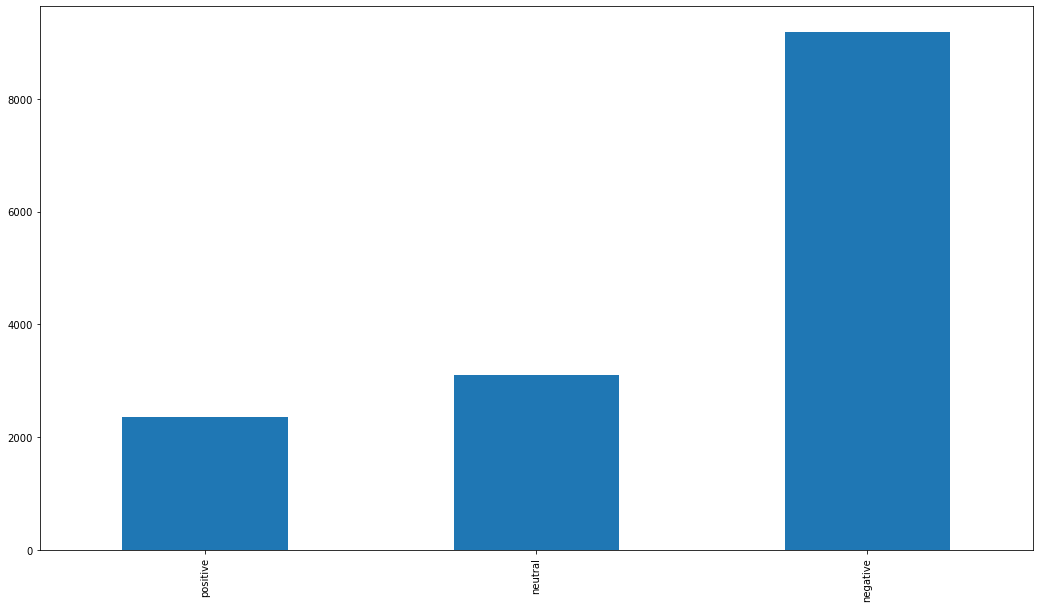

In [12]:
x = twitter_airline.airline_sentiment.value_counts().sort_values().plot(kind = 'bar', figsize=(17.8,10))

## Length of Texts: Before and After Clean and Preprocess Texts

We can easily compute the length of a text feature by using pandas.Series.str.len(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.len.html). Let's look into the size of the texts before and after we clean them.

In [13]:
twitter_airline["len_text_bc"] = twitter_airline["text_review"].str.len()
twitter_airline["len_text_ac"] = twitter_airline["text_review_cleaned"].str.len()

In [14]:
# Set the format of numerical values for Pandas library
# It only shows two decimal places
pd.options.display.float_format = "{:.2f}".format
twitter_airline[["len_text_bc", "len_text_ac"]].describe()

,len_text_bc,len_text_ac
count,14640.00,14640.00
mean,124.25,93.58
std,39.66,39.04
min,24.00,2.00
25%,95.00,63.00
50%,135.00,102.00
75%,157.00,126.00
max,204.00,178.00


Next,let's graphically summarize them using subplots. Then we can compare them side by side.

### Boxplot of the Length of the Texts

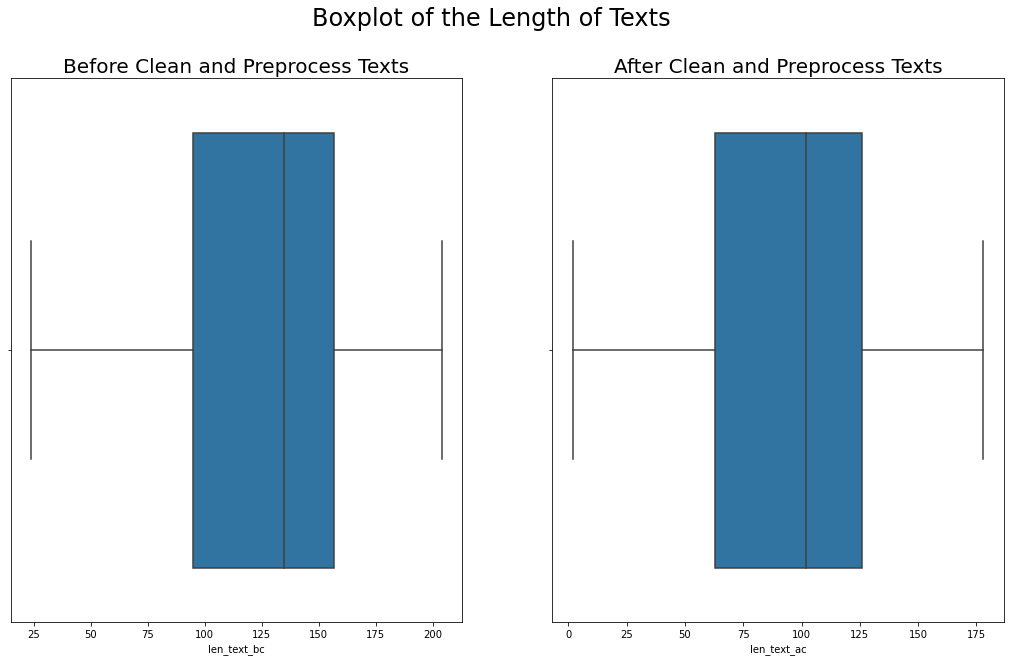

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize = (17.8, 10))
fig.suptitle('Boxplot of the Length of Texts', fontsize= 24)

# Plot the texts before cleaning
sns.boxplot(ax=axes[0], x=twitter_airline["len_text_bc"])
axes[0].set_title("Before Clean and Preprocess Texts", fontsize= 20)
# Plot the texts after cleaning
sns.boxplot(ax=axes[1], x=twitter_airline["len_text_ac"])
x= axes[1].set_title("After Clean and Preprocess Texts", fontsize= 20)

### Histogram of the Length of the Texts

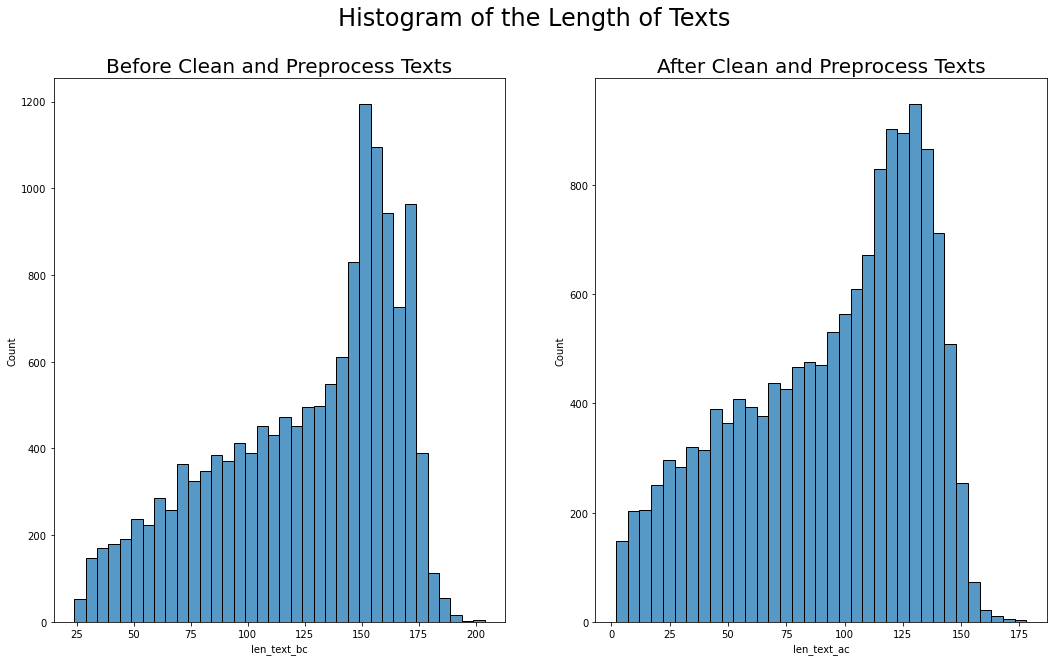

In [16]:

fig, axes = plt.subplots(1, 2, figsize = (17.8, 10))
fig.suptitle('Histogram of the Length of Texts', fontsize= 24)

# Plot the texts before cleaning
sns.histplot(ax=axes[0], data = twitter_airline, x="len_text_bc")
axes[0].set_title("Before Clean and Preprocess Texts", fontsize= 20)
# Plot the texts after cleaning
sns.histplot(ax=axes[1], data = twitter_airline, x="len_text_ac")
x= axes[1].set_title("After Clean and Preprocess Texts", fontsize= 20)


### Density plot of the Length of the Texts

The area under the curve is the corresponding probablitity

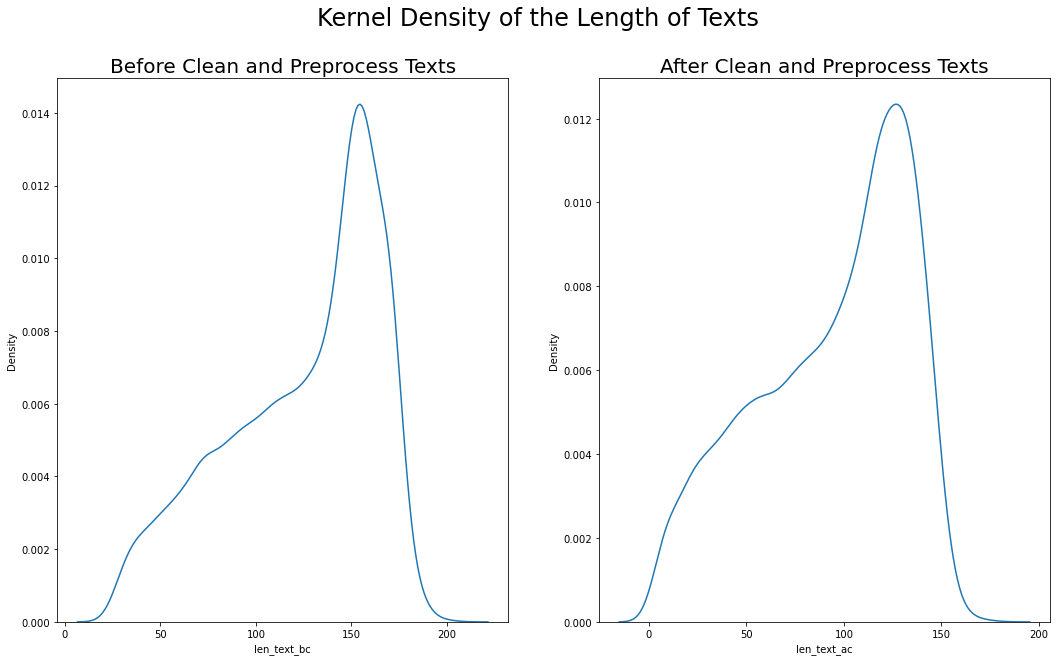

In [17]:

fig, axes = plt.subplots(1, 2, figsize = (17.8, 10))
fig.suptitle('Kernel Density of the Length of Texts', fontsize= 24)

sns.kdeplot(ax=axes[0], data = twitter_airline, x="len_text_bc")
axes[0].set_title("Before Clean and Preprocess Texts", fontsize= 20)

sns.kdeplot(ax=axes[1], data = twitter_airline, x="len_text_ac")
x= axes[1].set_title("After Clean and Preprocess Texts", fontsize= 20)



### Histogram and Density plot of the Length of the Texts

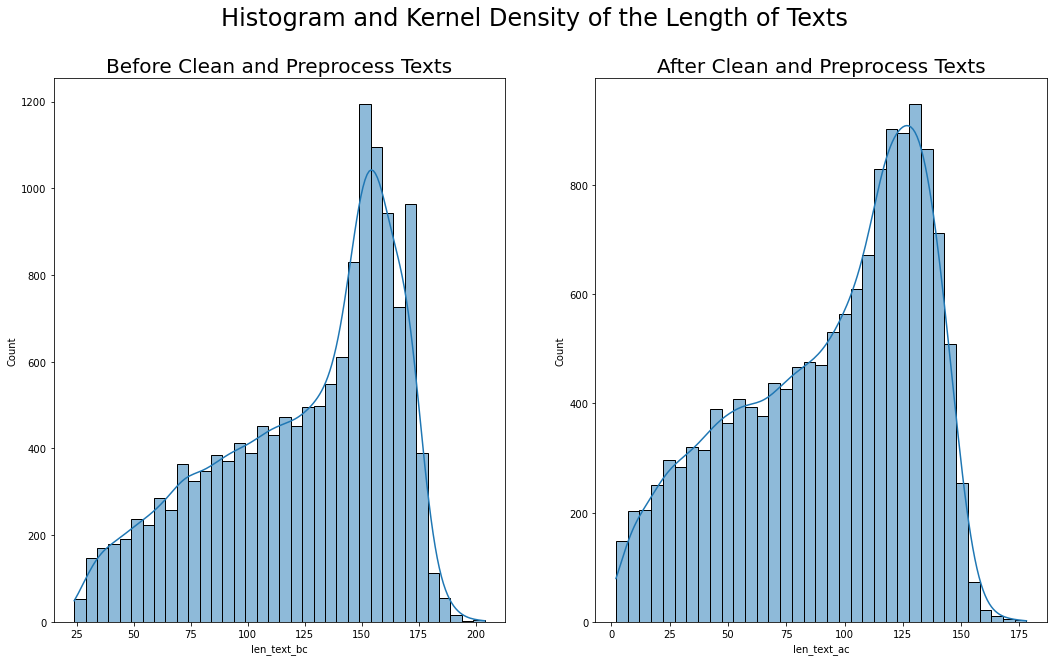

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (17.8, 10))
fig.suptitle('Histogram and Kernel Density of the Length of Texts', fontsize= 24)

sns.histplot(ax=axes[0], data = twitter_airline, x="len_text_bc", kde = True)
axes[0].set_title("Before Clean and Preprocess Texts", fontsize= 20)

sns.histplot(ax=axes[1], data = twitter_airline, x="len_text_ac", kde = True)
x= axes[1].set_title("After Clean and Preprocess Texts", fontsize= 20)



## Length of Words/Tokens: Before and After Clean and Preprocess Texts

Tokens/words play an important role in text mining. Let's count the number of tokens in each sentence/review.

In [19]:
twitter_airline["count_word_bc"] = twitter_airline["text_review"].str.split().str.len()
twitter_airline["count_word_ac"] = twitter_airline["text_review_cleaned"].str.split().str.len()

In [20]:
# Set the format of numerical values
pd.options.display.float_format = "{:.2f}".format
twitter_airline[["count_word_bc", "count_word_ac"]].describe()

,count_word_bc,count_word_ac
count,14640.00,14640.00
mean,21.54,18.55
std,7.19,7.77
min,5.00,1.00
25%,16.00,13.00
50%,23.00,20.00
75%,27.00,25.00
max,40.00,36.00


### Boxplot of the Word Count

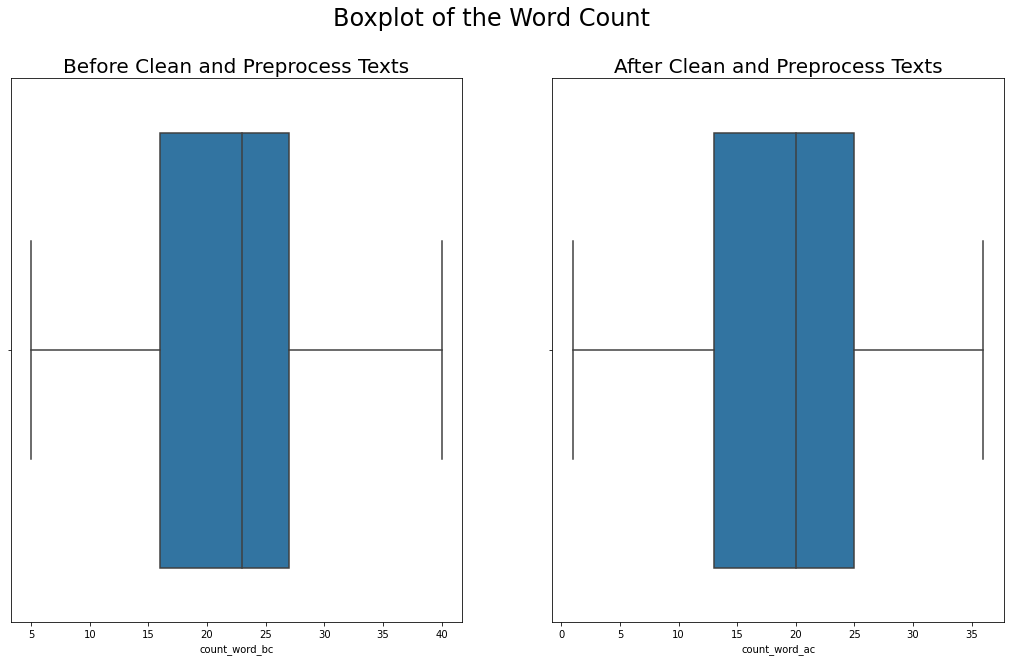

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize = (17.8, 10))
fig.suptitle('Boxplot of the Word Count', fontsize= 24)

sns.boxplot(ax=axes[0], x=twitter_airline["count_word_bc"])
axes[0].set_title("Before Clean and Preprocess Texts", fontsize= 20)

sns.boxplot(ax=axes[1], x=twitter_airline["count_word_ac"])
x = axes[1].set_title("After Clean and Preprocess Texts", fontsize= 20)

### Histogram of the Word Count

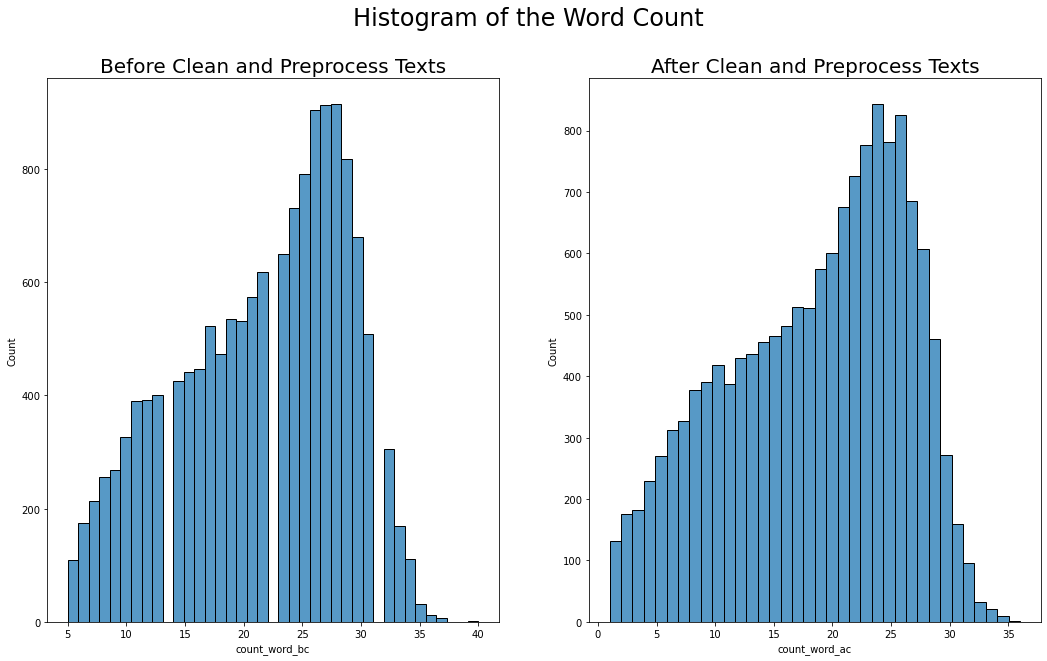

In [22]:
fig, axes = plt.subplots(1, 2, figsize = (17.8, 10))
fig.suptitle('Histogram of the Word Count', fontsize= 24)

sns.histplot(ax=axes[0], data = twitter_airline, x="count_word_bc")
axes[0].set_title("Before Clean and Preprocess Texts", fontsize= 20)

sns.histplot(ax=axes[1], data = twitter_airline, x="count_word_ac")
x= axes[1].set_title("After Clean and Preprocess Texts", fontsize= 20)

### Density Plot of the Word Count

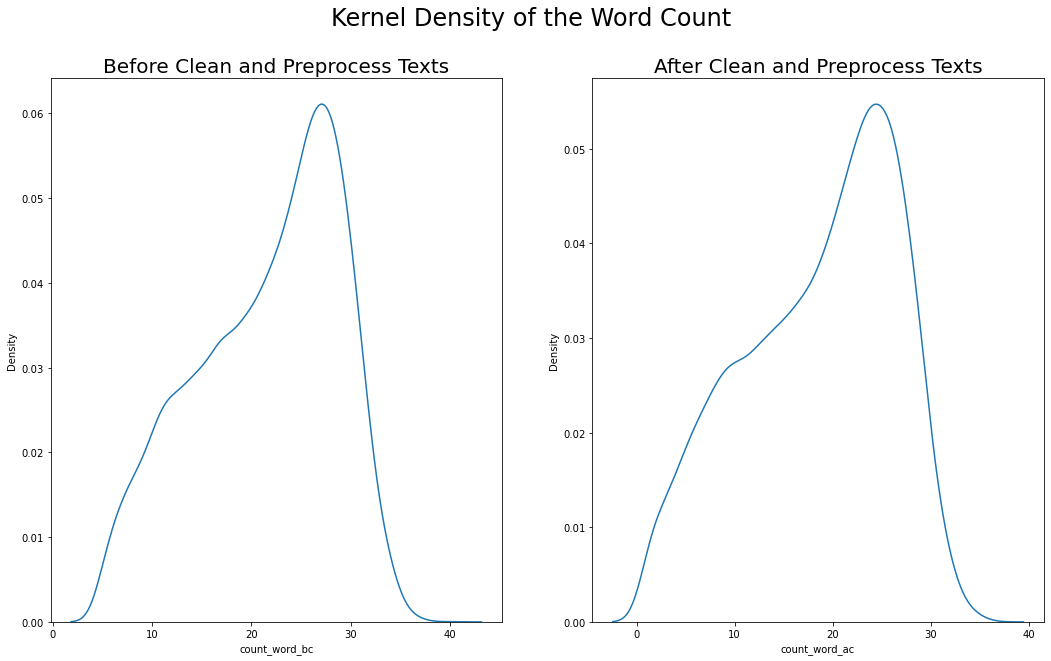

In [23]:
fig, axes = plt.subplots(1, 2, figsize = (17.8, 10))
fig.suptitle('Kernel Density of the Word Count', fontsize= 24)

sns.kdeplot(ax=axes[0], data = twitter_airline, x="count_word_bc")
axes[0].set_title("Before Clean and Preprocess Texts", fontsize= 20)

sns.kdeplot(ax=axes[1], data = twitter_airline, x="count_word_ac")
x= axes[1].set_title("After Clean and Preprocess Texts", fontsize= 20)


### Histogram and Density Plot of the Word Count

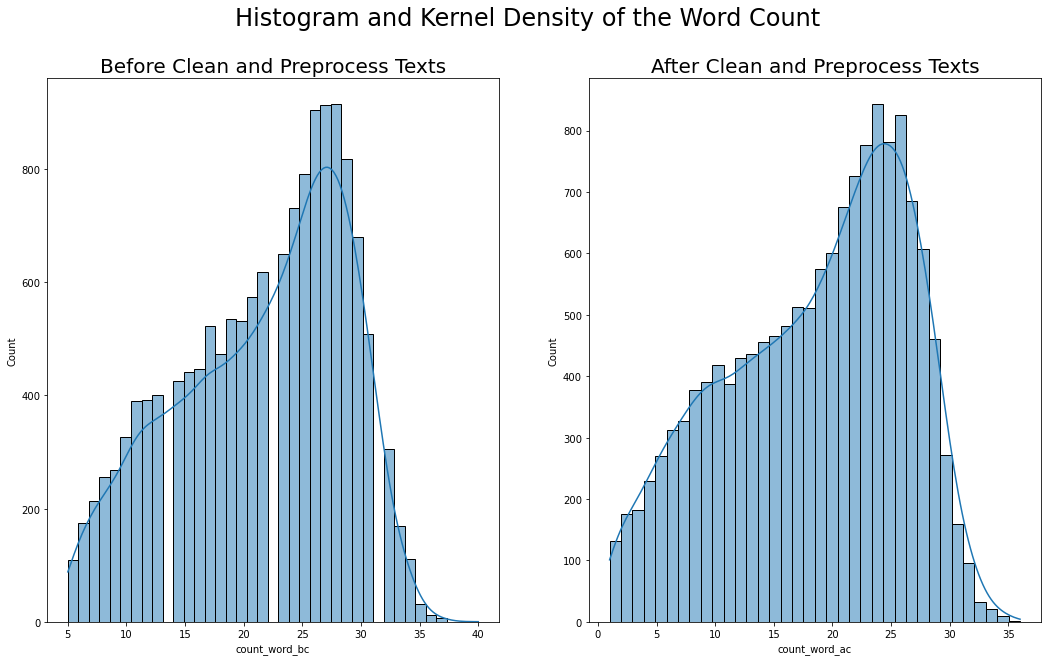

In [24]:
fig, axes = plt.subplots(1, 2, figsize = (17.8, 10))
fig.suptitle('Histogram and Kernel Density of the Word Count', fontsize= 24)

sns.histplot(ax=axes[0], data = twitter_airline, x="count_word_bc", kde = True)
axes[0].set_title("Before Clean and Preprocess Texts", fontsize= 20)

sns.histplot(ax=axes[1], data = twitter_airline, x="count_word_ac", kde = True)
x= axes[1].set_title("After Clean and Preprocess Texts", fontsize= 20)


## Distribution of the Top Unigrams: Before and After Clean the Texts

We can extract features from the texts using N-grams. Unigram (1-gram) is a one-word sequence from the texts. It is beneficial for text mining. A classical algorithm is the tf-idf model covered before. A numerical feature from text is intended to reflect how important a word is to a document in a collection or corpus. 

In [25]:
import numpy as np # for sorting the frequency/count
from sklearn.feature_extraction.text import TfidfVectorizer #convert texts to numerical arrarys/values

# Define a function returning the top words (default top 5 words)
def get_top_tf_idf_words(df = twitter_airline, col = "text_review", use_idf = True, ngram_range =(1, 1), top_n= 5):
    
    tf_idf = TfidfVectorizer(stop_words='english', ngram_range = ngram_range, use_idf = use_idf)
    # Fit and transform the corpus
    X_sparse_matrix = tf_idf.fit_transform(df[col])
    #feature names are tokens
    feature_names = np.array(tf_idf.get_feature_names())
    # Generate the tf-idf matrix
    tf_idf_sparse_matrix = tf_idf.transform(df[col])
    # Rank the matrix by tf-idf values and return the indices of the top_n values
    # https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
    # it ranks from the smallest to the largest
    # the top(largest) values are in the end of the array
    # we use negative indices to get them
    sorted_idx = np.argsort(tf_idf_sparse_matrix.data)[:-(top_n+1):-1]
    
    # Return the feature names(for human) and corresponding tf_idf values in a df
    return pd.DataFrame(
    {'feature': feature_names[tf_idf_sparse_matrix.indices[sorted_idx]], # based on fancy indexing of Python
     'tf_idf': tf_idf_sparse_matrix.data[sorted_idx], # based on fancy indexing of Python
    })

top_n = 20
# Generate top tf-idf words for the texts before and after cleaning
df_text_bc = get_top_tf_idf_words(df = twitter_airline, col = "text_review", top_n= top_n)
df_text_ac = get_top_tf_idf_words(df = twitter_airline, col = "text_review_cleaned", top_n= top_n)



Let's plot the top 20 values of the tf-idf in the unigrams.

In [1]:
import matplotlib.pyplot as plt
# x is from 0 to top_n-1; 0, 1, 2, ..., top_n-1
x=range(0, top_n)

fig, ax = plt.subplots(2, 1, figsize = (17.8, 10))

fig.suptitle('Top Unigrams of the TF-IDF', fontsize= 24)

# Plot x and tf_idf using blue circle markers
ax[0].plot(x, df_text_bc.tf_idf, 'bo')
ax[0].set_title(' Before Clean the Texts', fontsize= 20)
# Set number of ticks for x-axis
ax[0].set_xticks(x)
# Set ticks labels for x-axis
x_ticks_labels = df_text_bc.feature
ax[0].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

# Plot x and tf_idf using blue circle markers
ax[1].plot(x, df_text_ac.tf_idf, 'bo')
ax[1].set_title(' After Clean the Texts', fontsize= 20)
# Set number of ticks for x-axis
ax[1].set_xticks(x)
# Set ticks labels for x-axis instead of using 0, 1, 2, ..., 19
x_ticks_labels = df_text_ac.feature
# set the word vertically to use less horizontal spaces
ax[1].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

# Adjust horizontal space
fig.subplots_adjust(hspace=1.5)
plt.show()



NameError: name 'top_n' is not defined

# stop here 9/29

##  Visualize Tokens using Scattertext

We are going to use Scattertext (https://github.com/JasonKessler/scattertext)  to create visualize terms. To use it, we need to install it. We run the following command in the **Anaconda Prompt**
<center> pip install scattertext  </center>

There are three cases of "negative", "neutral" and "positive" in the airline_sentiment. We want to identify the words associated with these sentiment.

Let's generate the corpus before and after cleaning the texts using the text_review and airline_sentiment.

In [27]:
# Use the scattetext and Spacy libraries
import scattertext as st
import spacy
# https://docs.python.org/3/library/pprint.html
from pprint import pprint

# Load the small model of Spacy
nlp = spacy.load("en_core_web_sm")

# Generate corpus for the before cleaning texts
corpus_bc = st.CorpusFromPandas(twitter_airline, 
                              category_col='airline_sentiment', #target with three cases; positvie, neutral, negative etc.
                              text_col='text_review', # corresponding text columns
                              nlp=nlp).build()
# Generate corpus for the cleaned texts
corpus_ac = st.CorpusFromPandas(twitter_airline, 
                              category_col='airline_sentiment', 
                              text_col='text_review_cleaned',
                              nlp=nlp).build()

First, we generate the term frequency associated with airline_sentiment. For illustration purposes, we create the term frequency for the positive sentiment only. Next, we create the corresponding score for the positive sentiment. Finally, we rank them by descending order.

In [28]:
# Create the term frequence for the sentiment before cleaning the texts
term_freq_df_bc = corpus_bc.get_term_freq_df()
# Create the positive score for the sentiment of positive review before cleaning the texts
# twitter_airline['airline_sentiment']; the target has only three cases of 
# "negative"    0.626913
# "neutral"     0.211680
# "positive"    0.161407
# Name: airline_sentiment, dtype: float64
# the name in the corpus_bc.get_scaled_f_scores must be strictly follows the name in the target
# but we can choose the name in the term_freq_df_bc as 'positive Score' or 'positiveScore'  
term_freq_df_bc['positive Score'] = corpus_bc.get_scaled_f_scores('positive')
# Rank them by descending order; note the by value  is 'positive freq'. It is combine the given 'positive' and the 'freq' choosen by the sc algorithm
term_freq_df_bc_freq = term_freq_df_bc.sort_values(by= 'positive freq', ascending=False)
term_freq_df_bc_Score = term_freq_df_bc.sort_values(by= 'positive Score', ascending=False)

# Create the term frequence for the sentiment after cleaning the texts
term_freq_df_ac = corpus_ac.get_term_freq_df()
# Create the positive score for the sentiment of positive review after cleaning the texts
term_freq_df_ac['positive Score'] = corpus_ac.get_scaled_f_scores('positive')
# Rank them by descending order
term_freq_df_ac_freq = term_freq_df_ac.sort_values(by= 'positive freq', ascending=False)
term_freq_df_ac_Score = term_freq_df_ac.sort_values(by= 'positive Score', ascending=False)



### Visualize the Term Frequence of the Tokens Associated with Positive Review

Let visualize the term frequence of tokens associated with positive reviews. We compare them side by side before cleaning and after cleaning the texts.

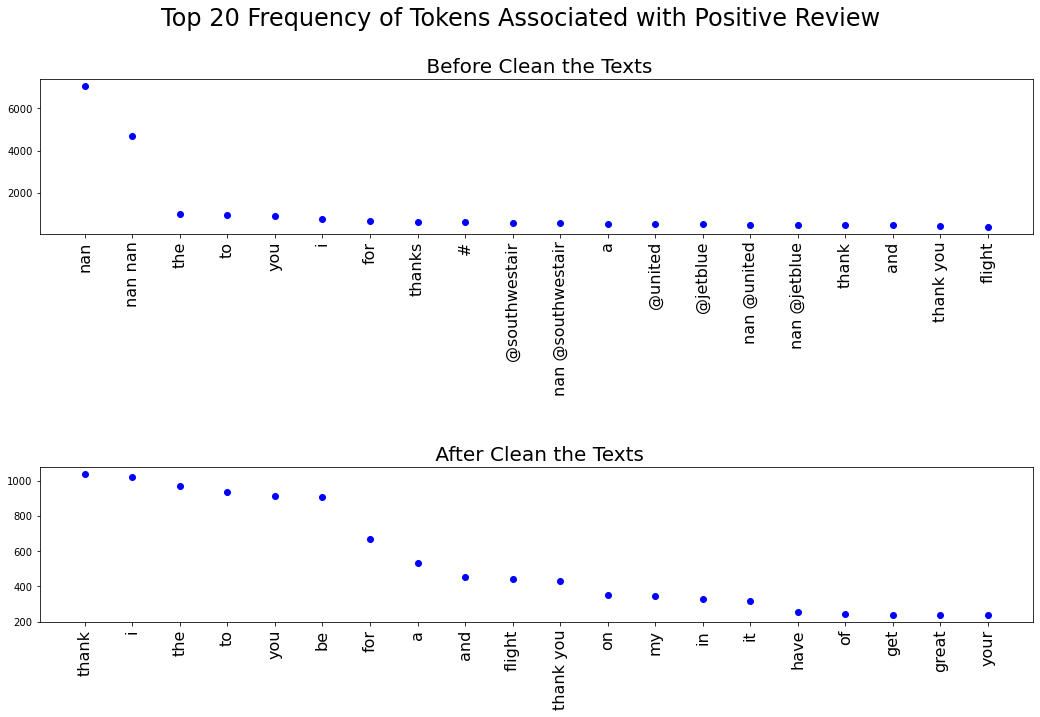

In [29]:
import matplotlib.pyplot as plt

# Specify the top n tokens to plot
top_n = 20
term_freq_df_ac_freq = term_freq_df_ac_freq.head(top_n)
term_freq_df_bc_freq = term_freq_df_bc_freq.head(top_n)
x = range(0, top_n)

fig, ax = plt.subplots(2, 1, figsize = (17.8, 10))

fig.suptitle('Top 20 Frequency of Tokens Associated with Positive Review', fontsize= 24)

# Plot x and tf using blue circle markers
ax[0].plot(x, term_freq_df_bc_freq["positive freq"], 'bo')
ax[0].set_title(' Before Clean the Texts', fontsize= 20)
# Set number of ticks for x-axis
ax[0].set_xticks(x)
# Set ticks labels for x-axis to be the tokens which is the corresponding index
x_ticks_labels = term_freq_df_bc_freq.index
ax[0].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

# Plot x and tf using blue circle markers
ax[1].plot(x, term_freq_df_ac_freq["positive freq"], 'bo')
ax[1].set_title(' After Clean the Texts', fontsize= 20)
# Set number of ticks for x-axis
ax[1].set_xticks(x)
# Set ticks labels for x-axis, which are the corresponding index
x_ticks_labels = term_freq_df_ac_freq.index
ax[1].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

# Adjust horizontal space
fig.subplots_adjust(hspace=1.5)
plt.show()

### Visualize the Positive Score of the Tokens Associated with Positive Reviews

Let visualize the scores of tokens associated with positive Reviews. We compare them side by side before cleaning and after cleaning the texts.

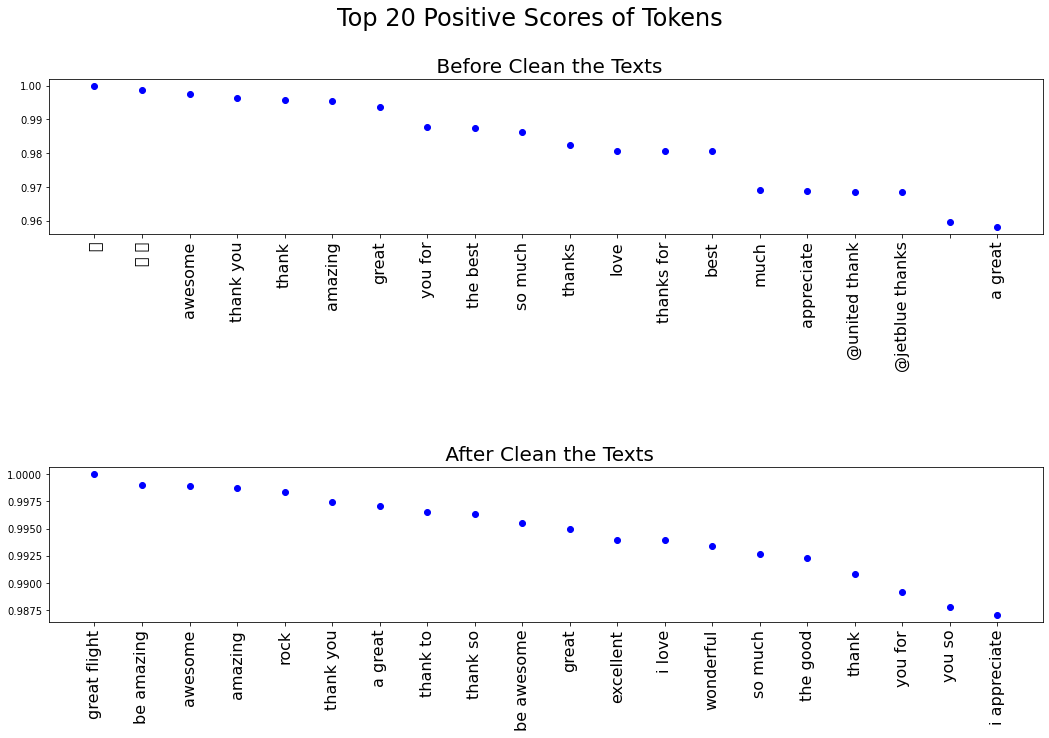

In [30]:
import matplotlib.pyplot as plt

top_n = 20
term_freq_df_ac_Score = term_freq_df_ac_Score.head(20)
term_freq_df_bc_Score = term_freq_df_bc_Score.head(20)
x = range(0, top_n)

fig, ax = plt.subplots(2, 1, figsize = (17.8, 10))

fig.suptitle('Top 20 Positive Scores of Tokens', fontsize= 24)

# Plot x and scores using blue circle markers
ax[0].plot(x, term_freq_df_bc_Score["positive Score"], 'bo')
ax[0].set_title(' Before Clean the Texts', fontsize= 20)
# Set number of ticks for x-axis
ax[0].set_xticks(x)
# Set ticks labels for x-axis to be the tokens
x_ticks_labels = term_freq_df_bc_Score.index
ax[0].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

# Plot x and scores using blue circle markers
ax[1].plot(x, term_freq_df_ac_Score["positive Score"], 'bo')
ax[1].set_title(' After Clean the Texts', fontsize= 20)
# Set number of ticks for x-axis
ax[1].set_xticks(x)
# Set ticks labels for x-axis to be the tokens
x_ticks_labels = term_freq_df_ac_Score.index
ax[1].set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

# Adjust horizontal space
fig.subplots_adjust(hspace=1.5)
plt.show()




## Word Vectors/Embeddings

We learned Word embedding in the previous week. It uses real-valued vectors to the representation of words for text analysis. Similar words are close to each other in the vector spaces. The dimensionality in word embeddings is typically between 50 and 300. It is tough for us to visualize them in a so high-dimensional vector space. We typically reduce the dimensionality and keep as much information as we could. Then we can visualize them in a lower-dimensional space, such as two-dimensional space. We will visualize the Word embedding using the following two methods:

+ Principal Component Analysis (PCA) (https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html)
+ t-distributed Stochastic Neighbor Embedding (t-SNE) (https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html#sphx-glr-auto-examples-manifold-plot-t-sne-perplexity-py)




### Build Sentence Embedding for Each Document

After we get the word/token embeddings, we can quickly generate the sentence embeddings by averaging all the word vectors. Spacy provides API to get the word vectors and sentence vectors, respectively. Let's create the sentence embeddings for all the documents/reviews using the **large Spacy model of en_core_web_lg**.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html

In [31]:
import spacy

# Load the large model for word embedding
nlp = spacy.load("en_core_web_lg")

data_bc = []
data_ac = []

# Generate only the first 10 sentence/doc embeddings
top_n = 10
#Based on iterrows on the data frame, we get the index and corresponding row
for idx, row in twitter_airline.iterrows():
    if idx < top_n:
        #Create the lists containing the texts, corresponding sentence/document embeddings, and sentiment
        # store, the texts, corresponding word embedding vector(higher dimensionality 300d), the correponding sentiment
        data_ac.append([row['text_review_cleaned'], nlp(row['text_review_cleaned']).vector, row['airline_sentiment']])
        data_bc.append([row['text_review'], nlp(row['text_review']).vector, row['airline_sentiment']])
     
    else:
        break
#Store the results in the dfs since it is much easier for us handling DF than list and tuples
df_ac = pd.DataFrame(data_ac, columns=['review_ac', "vector", "airline_sentiment"])
df_bc = pd.DataFrame(data_bc, columns=['review_bc', "vector", "airline_sentiment"])
pprint(df_ac)

                                           review_ac  \
0                                           what say   
1  plus you ve add commercial to the experience t...   
2  i didn t today must mean i need to take anothe...   
3  bad flight it s really aggressive to blast obn...   
4  can t tell and it s a really big bad thing abo...   
5  can t tell seriously would pay 30 a flight for...   
6  yes nearly every time i fly vx this ear worm w...   
7  really miss a prime opportunity for men withou...   
8                       well i didn t but now i do d   
9  it be amazing and arrive an hour early you re ...   

                                              vector airline_sentiment  
0  [-0.179659, 0.52937996, -0.28561, -0.18415, 0....           neutral  
1  [0.01236734, 0.030105663, -0.14043833, -0.0777...          positive  
2  [0.053040337, 0.15772668, -0.22086829, -0.0307...           neutral  
3  [-0.1592806, 0.18310058, -0.10841515, -0.00814...          negative  
4  [-0.1770321, 0.

### Visualize the Sentence Embeddings using PCA

We first perform PCA and extract two principal components from the 300-dimensional space. 

In [32]:
from sklearn.decomposition import PCA 

# Convert the dataframe to a n-dimensional array
X_bc = np.array(list(df_bc["vector"]))
X_ac = np.array(list(df_ac["vector"]))

# Extract 2 principal componets using PCA, which can easily to plot in 2D space
pca = PCA(n_components=2)
pca_bc_2d = pca.fit_transform(X_bc)
pca_ac_2d = pca.fit_transform(X_ac)




Next, let's visualize them side by side.

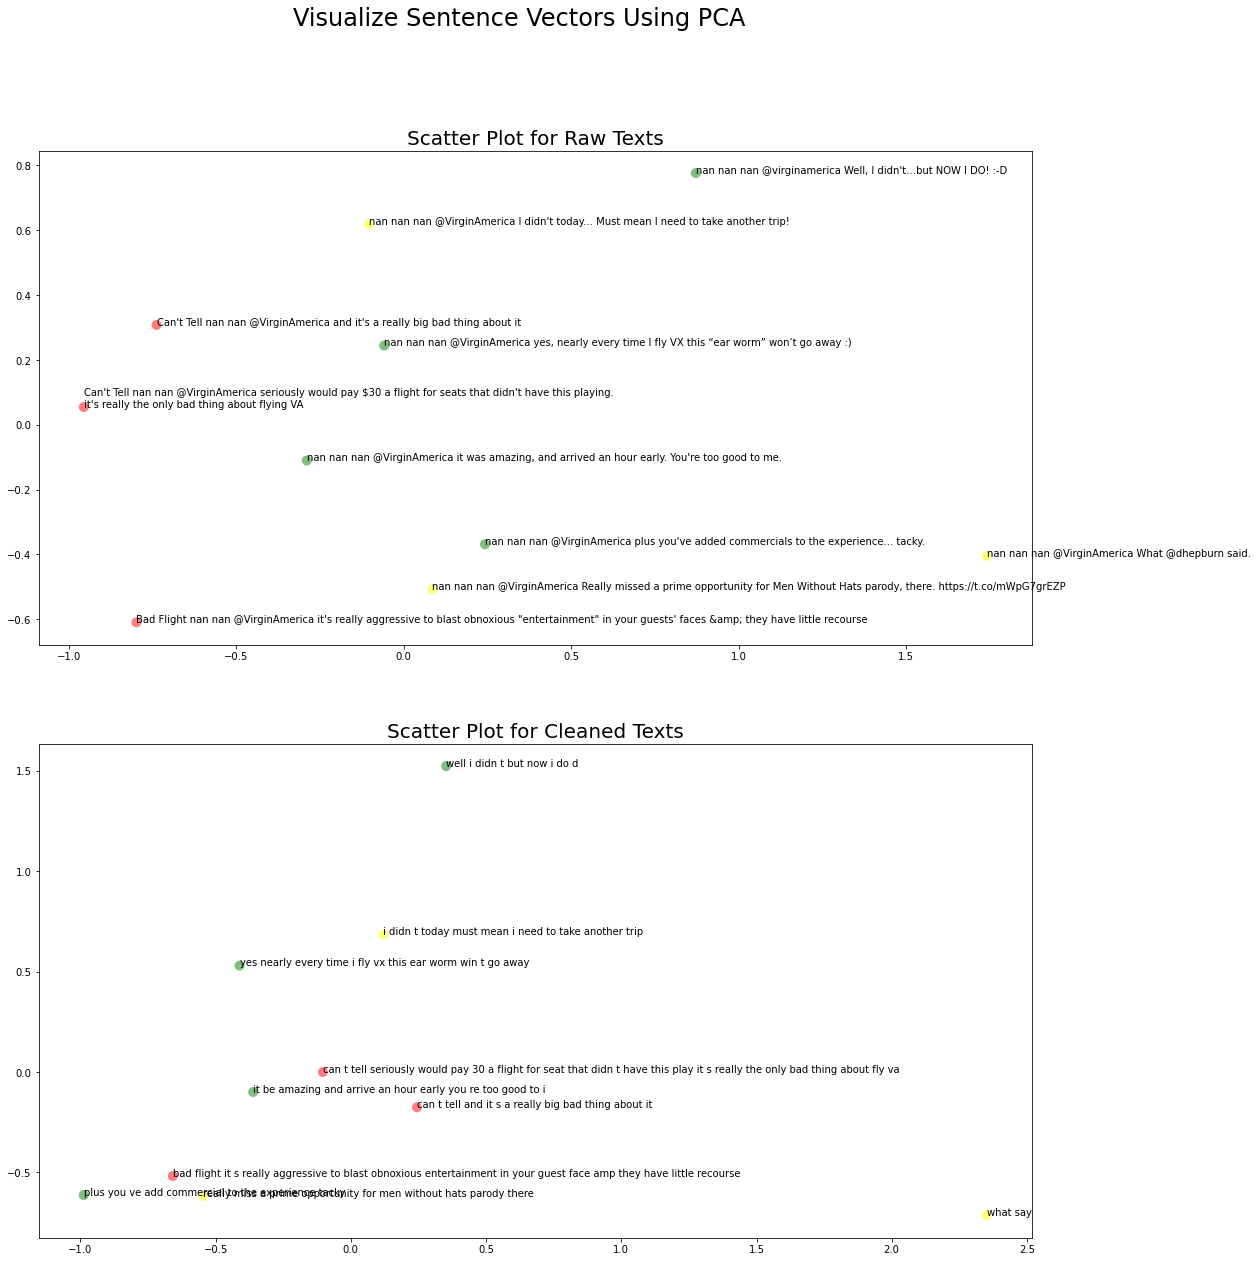

In [33]:
# Plot the  PCA visuals side-by-side
#Get the reiview texts including original texts and cleaned texts
review_ac = df_ac.review_ac
review_bc = df_bc.review_bc

fig, ax = plt.subplots(2, 1, figsize = (17.8, 10*2))
fig.suptitle('Visualize Sentence Vectors Using PCA', fontsize= 24)
# Color the sentence embeddings based on the airline sentiment
colors = {'positive':'green', 'negative':'red', 'neutral':'yellow'}

#Next, scatter plot the 2D numerical values since we run pca = PCA(n_components=2)
#the first dimension is x which is pca_bc_2d[:,0], the 2nd dimesion is y, which is pca_bc_2d[:,1]
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter
# colors are based on airline_sentiment column, which has 3 cases
# it maps the sentiments to different colors using the map of {'positive':'green', 'negative':'red', 'neutral':'yellow'}
ax[0].scatter(pca_bc_2d[:,0],pca_bc_2d[:,1], s = 100,  c= df_bc["airline_sentiment"].map(colors), 
            cmap = "coolwarm", edgecolor = "None", alpha=0.5)
ax[0].set_title('Scatter Plot for Raw Texts', fontsize= 20)
# Label the points using the texts for human to read and understand
for idx, txt in enumerate(review_bc):
    #label the point (x = pca_bc_2d[idx, 0], y = pca_bc_2d[idx, 1]) using txt
    ax[0].annotate(txt, (pca_bc_2d[idx, 0],pca_bc_2d[idx, 1]))

ax[1].scatter(pca_ac_2d[:,0],pca_ac_2d[:,1], s = 100,  c = df_ac["airline_sentiment"].map(colors), 
            cmap = "coolwarm", edgecolor = "None", alpha=0.5)
# Label the points using the texts
for idx, txt in enumerate(review_ac):
    ax[1].annotate(txt, (pca_ac_2d[idx, 0],pca_ac_2d[idx, 1]))
ax[1].set_title('Scatter Plot for Cleaned Texts', fontsize= 20)

plt.show()

### Visualize the Sentence Embeddings using t-SNE

We first perform t-SNE and extract two principal components from the 300-dimensional space. 

[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.000s...
[t-SNE] Computed neighbors for 10 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.105503
[t-SNE] KL divergence after 700 iterations: 0.251884
[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.000s...
[t-SNE] Computed neighbors for 10 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.597729
[t-SNE] KL divergence after 800 iterations: 0.251930


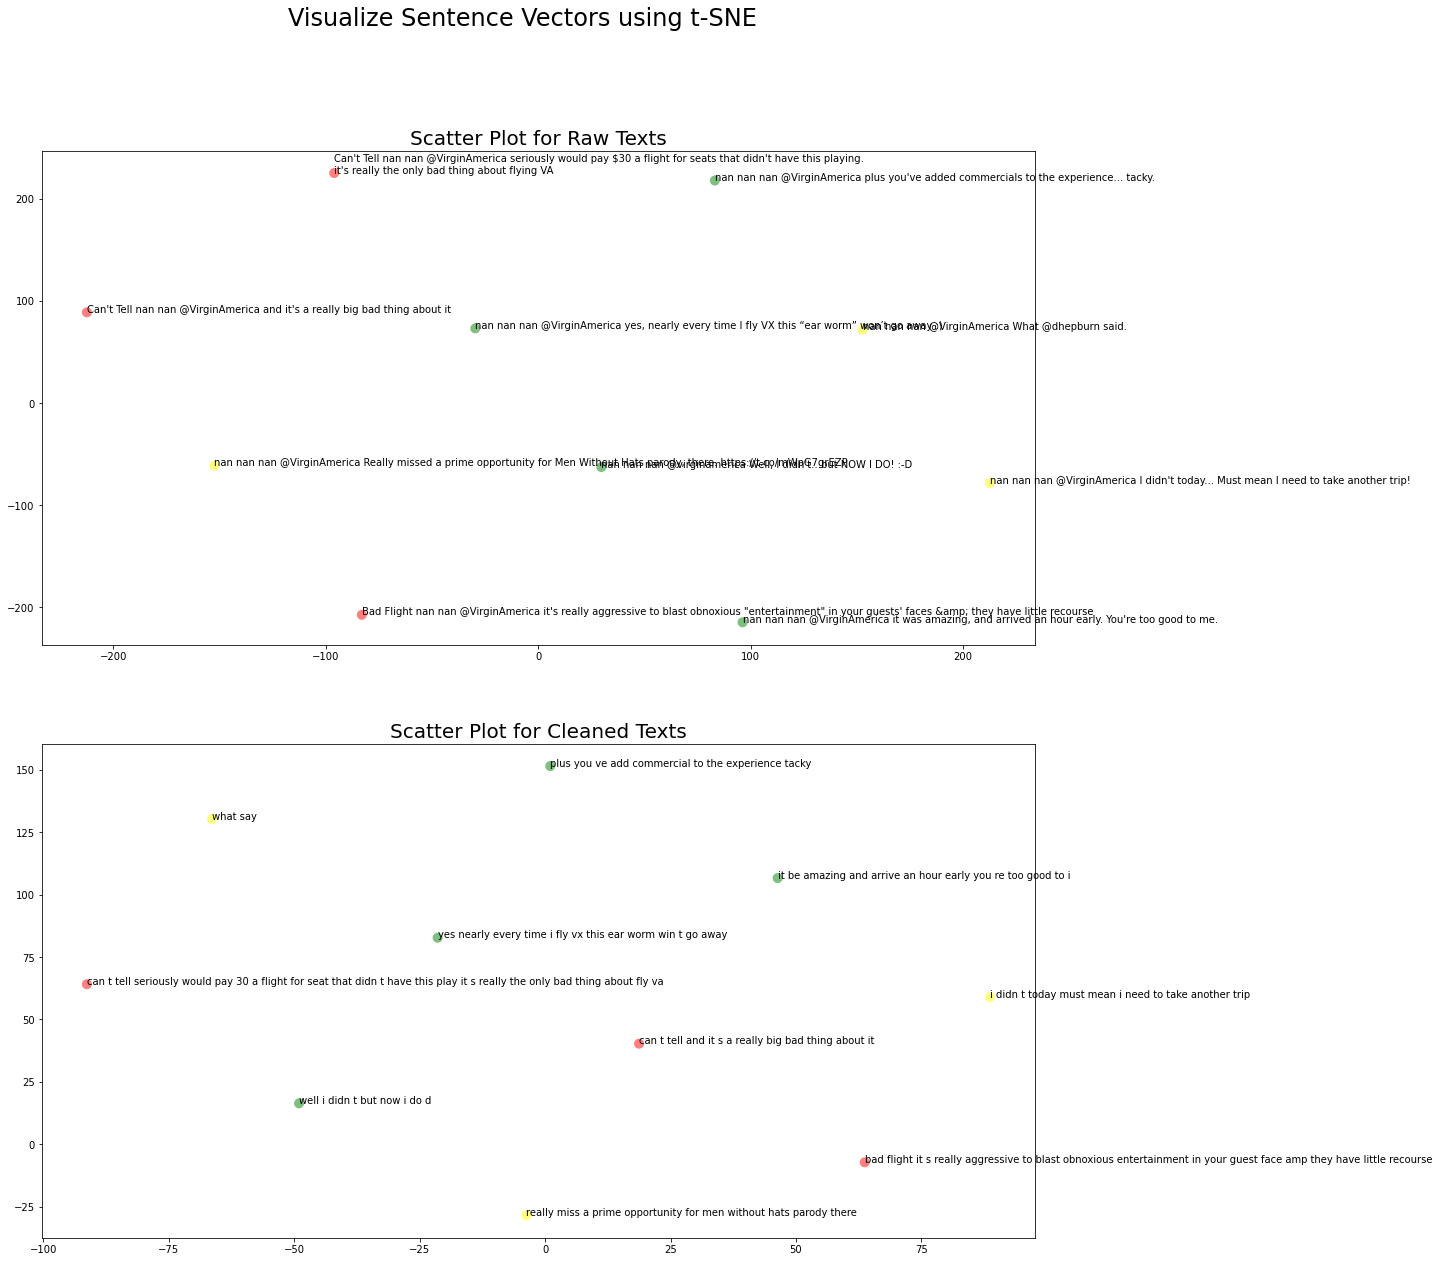

In [34]:
from sklearn.manifold import TSNE 

# Extract 2 componets using t-SNE
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=4000)
tsne_ac = tsne.fit_transform(X_ac)
tsne_bc = tsne.fit_transform(X_bc)

# Plot the 2 component side-by-side
review_ac = df_ac.review_ac
review_bc = df_bc.review_bc

fig, ax = plt.subplots(2, 1, figsize = (17.8, 10*2))
fig.suptitle('Visualize Sentence Vectors using t-SNE', fontsize= 24)
# color map the sentiments
colors = {'positive':'green', 'negative':'red', 'neutral':'yellow'}

ax[0].scatter(tsne_bc[:,0],tsne_bc[:,1], s = 100,  c= df_bc["airline_sentiment"].map(colors), 
            cmap = "coolwarm", edgecolor = "None", alpha=0.5)

ax[0].set_title('Scatter Plot for Raw Texts', fontsize= 20)
# Label the points using texts then human can read and understand
for idx, txt in enumerate(review_bc):
    #              (review, (x,y))
    ax[0].annotate(txt, (tsne_bc[idx, 0],tsne_bc[idx, 1]))

ax[1].scatter(tsne_ac[:,0],tsne_ac[:,1], s = 100,  c= df_ac["airline_sentiment"].map(colors),
            cmap = "coolwarm", edgecolor = "None", alpha=0.5)
# Label the points using texts
for idx, txt in enumerate(review_ac):
    ax[1].annotate(txt, (tsne_ac[idx, 0],tsne_ac[idx, 1]))
ax[1].set_title('Scatter Plot for Cleaned Texts', fontsize= 20)

plt.show()

# Summary

+ We visualize the categorical variables.
+ We generate the boxplots, histograms, and density plots of the length of the texts.
+ We create the boxplots, histograms, and density plots of the word count.
+ We visualize the distribution of the top unigrams.
+ We generate the frequency and scores of tokens associated with the sentiment.
+ We visualize word vectors using PCA and t-SNE.







# Weekly Assignments:

# Week 7: Project 7 

**Assignment Development Feedback** 
Remember, the weekly assignments in this course are intentionally complex. All of the skills and knowledge needed to complete the assignments has been woven into the course modules, but I am not teaching directly to the assignments. Instead, I am asking you to pull together the pieces of the puzzle which will help you solve the problem. It is important you DO NOT PROCRASTINATE. I am here to support you, but timely feedback requires you to work proactively. 

At any time during week 7, you may submit the Jupyter Notebook, draft files, etc., along with specific questions related to the development of this assignment. The goal is not for me to "pre-grade" your work, but offer guidance and point you in the right direction. I encourage you to make use of this opportunity to refine and develop your work. Refer to my Instructor Introduction and the Course Syllabus for the best ways to contact me, in order to get feedback, and expected response times. 

**For the purposes of this assignment, use Jupyter Notebook**.

Your submission should have one file. This file should be the JupyterNotebook and it should be saved like "Project6_LastName_FirstName.ipynb" (notice the .ipynb as the file extension of the JupyterNotebook script). You need to add the narrative and run the cells and get the corresponding output for each cell.

Assignment:

<font color='red'> **For each question make sure that your work is not repeating something in the course modules or the textbook. Each response must be original and your own submission. You are strictly prohibited from having another person(s) write, review or edit your solution.  Failure to follow this may result in a failing grade.** </font>



You are a data scientist working for a Consulting Firm. You are given a dataset containing in sentiment140.csv. The data set has six columns **without header**:

0. - the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
1. - the id of the tweet (2087)
2. - the date of the tweet (Sat May 16 23:58:44 UTC 2009)
3. - the query (lyx). If there is no query, then this value is NO_QUERY.
4. - the user that tweeted (robotickilldozr)
5. - the text of the tweet ("Lyx is cool")

Data source: http://help.sentiment140.com/for-students

Our goal is to **visualize the text of the tweet**.



Q1. Load the dataset of sentiment140.csv into memory.

Q2. Clean and preprocess the texts.

Q3  Graphically summarize the polarity of the tweet. 

Q4. Graphically summarize the length of the text of the tweet using.

+ boxplot
+ histogram
+ density plot


Q5. Graphically summarize the word count of the text of the tweet using

+ boxplot
+ histogram
+ density plot

Q6. Graphically summarize the top 10 **bigrams (2-gram)** of the tf-idf of the text of the tweet.

Q7. Visualize the top 10 term frequency of the tokens associated with negative tweets using scattertext.

   
Q8. Visualize the top 10 negative scores of the tokens associated with negative tweets using scattertext.

Q9. Visualize the first five sentences embedding for each tweet using PCA.

Q10. Visualize the first five sentences embedding for each tweet using t-SNE.






# **Grading policies on project:**

This is the rubric the instructor use to grade the projects. This allowed for fine but clear distinctions in evaluating the students’ projects.

+ **Python Codes and Style in the Code Cells**

    + 15 pts: Python codes are easier to read, share, and verify. There are comments in the codes. There are no bugs in the script.
    + 12 pts: Pyton codes are easier to read, share, and verify. There are few comments. There are less than 3 bugs in the script.
    + 9 pts: Python codes could be read. There is no comment. There are less than 4 bugs in the script.
    + 6 pts: Python codes are hard to read. There is no comment. There are more than 5 bugs in the script
    + 3 pts: Python codes are hard to read. There is no comments. There are more than 5 bugs in the script.
+ **Interpretation and Use of Model in the Markdown Cells**
    + 10 pts: The data and model is accurately interpreted to justify the answer, and sufficient data and model is used to defend the main argument.
    + 8 pts: The data and model is accurately interpreted to justify the answer, and model is used to defend the main argument, but it might not be sufficient.
    + 6 pts: Data and model is used to defend the main argument, but it is not accurately interpreted the idea and model, and it might not be sufficient.
    + 4 pts: Data and model is used to defend the main argument, but it is insufficient
    + 2 pts: Data and model is provided, but it is not used to defend the main argument.
